Estimated Mean (Original Data): 49.67
Estimated Standard Deviation (Original Data): 9.82
Estimated Mean with Outliers: 53.22
Estimated Standard Deviation with Outliers: 18.80


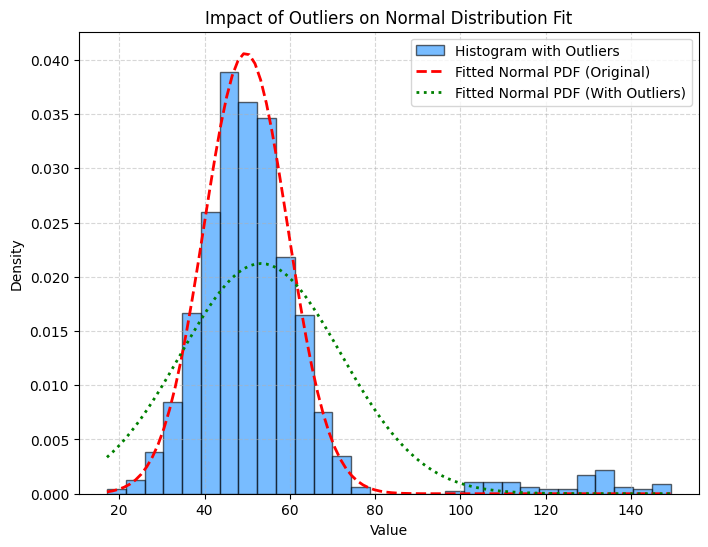

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


#Simulate 1000 samples from a normal distribution with mean=50 and std=10
np.random.seed(69420) 
mu, sigma = 50, 10
data = np.random.normal(mu, sigma, 1000)

#Generate 50 outlier samples from a uniform distribution
outliers = np.random.uniform(100, 150, 50)

#Combine normal data with outliers
data_with_outliers = np.concatenate([data, outliers])

# Normal Distribution Fitting (Estimating Parameters with MLE)
# Estimate parameters for original data (MLE)
mu_original, sigma_original = np.mean(data), np.std(data, ddof=1)

#Estimate parameters for data with outliers (MLE)
mu_outliers, sigma_outliers = np.mean(data_with_outliers), np.std(data_with_outliers, ddof=1)

# Print estimated parameters for both cases
print(f"Estimated Mean (Original Data): {mu_original:.2f}")
print(f"Estimated Standard Deviation (Original Data): {sigma_original:.2f}")
print(f"Estimated Mean with Outliers: {mu_outliers:.2f}")
print(f"Estimated Standard Deviation with Outliers: {sigma_outliers:.2f}")

#Generate x values for PDF plotting
x_values = np.linspace(min(data_with_outliers), max(data_with_outliers), 100)

# 7. Compute PDF values for both original and outlier-affected data
pdf_values_original = stats.norm.pdf(x_values, mu_original, sigma_original)
pdf_values_outliers = stats.norm.pdf(x_values, mu_outliers, sigma_outliers)

#Plot histogram with overlaid PDFs
plt.figure(figsize=(8, 6))
plt.hist(data_with_outliers, bins=30, density=True, alpha=0.6, color='dodgerblue', edgecolor='black', label="Histogram with Outliers")
plt.plot(x_values, pdf_values_outliers, color='green', linestyle='dotted', linewidth=2, label="Fitted Normal PDF (With Outliers)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Impact of Outliers on Normal Distribution Fit")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


## Effect of Outliers on Parameter Estimation & Outlier Detection

### **1. How do outliers affect parameter estimation?**
Outliers significantly **inflate the mean** and **increase the standard deviation**, making the dataset appear more variable than it actually is. Below, we compare the estimated parameters **before and after adding outliers**:

| Data | Estimated Mean (μ) | Estimated Standard Deviation (σ) |
|------|-----------------|--------------------------|
| **Original Data** | 49.67 | 9.82 |
| **With Outliers** | 53.22 | 18.80 |

We can see that:
- **Mean shift:** The mean increased from **49.67 to 53.22**, meaning that outliers **pulled the mean toward the higher values**.
- **Variance inflation:** The standard deviation **jumped from 9.82 to 18.80**, showing that the spread of data increased due to the extreme outlier values.

### **2. Why does this happen?**
Using **Maximum Likelihood Estimation (MLE)**, the mean and variance are calculated as:

$$ \hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} x_i $$

$$ \hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \hat{\mu})^2 $$

When we add outliers:
- The **mean increases** because outliers **contribute disproportionately** to the sum.
- The **variance is inflated** since the squared deviations \((x_i - \hat{\mu})^2\) are much larger for extreme values.

This distorts the normality assumption and can **mislead models** that assume a well-behaved distribution.

### **3. How to detect outliers?**
To mitigate the impact of outliers, we can use statistical techniques:

#### **Z-Score Method**
A data point is considered an outlier if its **Z-score exceeds 3**:

$$ Z = \frac{x - \mu}{\sigma} $$

If \( |Z| > 3 \), the point is significantly different from the mean.

#### **Histogram:** Outliers create **a long tail** in the distribution.

### **4. Why does outlier detection matter?**
Outliers **distort statistical analysis and machine learning models**, leading to:
- **Poor model generalization** (overly large variance).
- **Biased estimates** (mean & standard deviation become unreliable).
- **Incorrect normality assumptions** (affecting models relying on Gaussian distributions).

By identifying and handling outliers correctly, we ensure **statistical reliability** and improve the robustness of machine learning models.
